<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Arshia Dadras <br>
   **Student ID**: 99109109 <br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [2]:
X, y = make_regression(n_samples=50000, n_features=8, noise=5)
y = y[:, np.newaxis]

In [3]:
def train_test_split(X, y, train_size=0.7):
    indexes = np.arange(0, X.shape[0])
    np.random.shuffle(indexes)

    id = int(train_size * X.shape[0])
    train, test = indexes[:id], indexes[id:]

    return X[train], y[train], X[test], y[test]

In [4]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [5]:
T = 100
losses = []
l1_ratios = []

for i in range(0, T + 1):
    parameters = {
        "tol": 0.05,
        "alpha": 0.1,
        "max_iter": 10000,
        "l1_ratio": i / T,
    }
    model = ElasticNet(**parameters)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    l1_ratios.append(i / T)
    losses.append(mean_squared_error(y_test, y_pred))

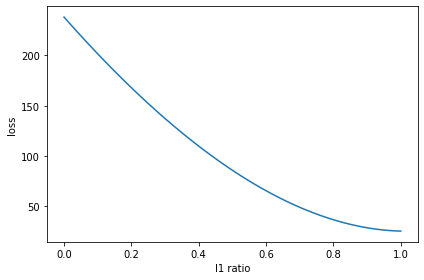

In [6]:
plt.plot(l1_ratios, losses)
plt.xlabel("l1 ratio")
plt.ylabel("loss")
plt.tight_layout()